<a href="https://colab.research.google.com/github/JannM7/ProyectoFinalAnalisisDeDatos/blob/main/Proyecto_Final_Visitantes_No_Residentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_visitantes = pd.read_csv("https://raw.githubusercontent.com/JannM7/ProyectoFinalAnalisisDeDatos/main/Visitantes_No_Residentes_20240807.csv")

In [ ]:
data_visitantes.head(10)

,Año,Mes,Departamento,Ciudad,País de Residencia,Extranjeros no Residentes
0,2019,12,Santander,Puente Nacional,España,1
1,2015,11,Santander,Piedecuesta,Alemania,1
2,2015,6,Nariño,Samaniego,Ecuador,1
3,2017,8,La Guajira,Dibulla,Argentina,1
4,2019,8,Cundinamarca,Girardot,Ecuador,1
5,2018,9,Huila,Pitalito,El Salvador,1
6,2018,7,Cundinamarca,Cota,Perú,2
7,2018,8,Valle del Cauca,Yumbo,República Dominicana,1
8,2015,9,Valle del Cauca,Cali,Chipre,1
9,2021,7,Cundinamarca,Suesca,Francia,1


In [ ]:
data_visitantes.tail(10)

,Año,Mes,Departamento,Ciudad,País de Residencia,Extranjeros no Residentes
389445,2024,4,Nariño,Pasto,República Dominicana,4
389446,2024,4,San Andres y Providencia,San Andrés,Reino Unido,12
389447,2024,4,Bolívar,Cartagena,Venezuela,961
389448,2024,4,Caldas,Chinchiná,Canadá,3
389449,2024,4,Tolima,Ibagué,Perú,16
389450,2024,4,San Andres y Providencia,Providencia,República Checa,5
389451,2024,4,Antioquia,Abejorral,Japón,1
389452,2024,4,Antioquia,Ituango,India,1
389453,2024,4,Antioquia,Armenia,México,2
389454,2024,4,Bogota D.C.,"Bogotá, D.C.",Azerbaiyán,8


In [ ]:
data_visitantes.columns

Index(['Año', 'Mes', 'Departamento', 'Ciudad', 'País de Residencia',
       'Extranjeros no Residentes'],
      dtype='object')

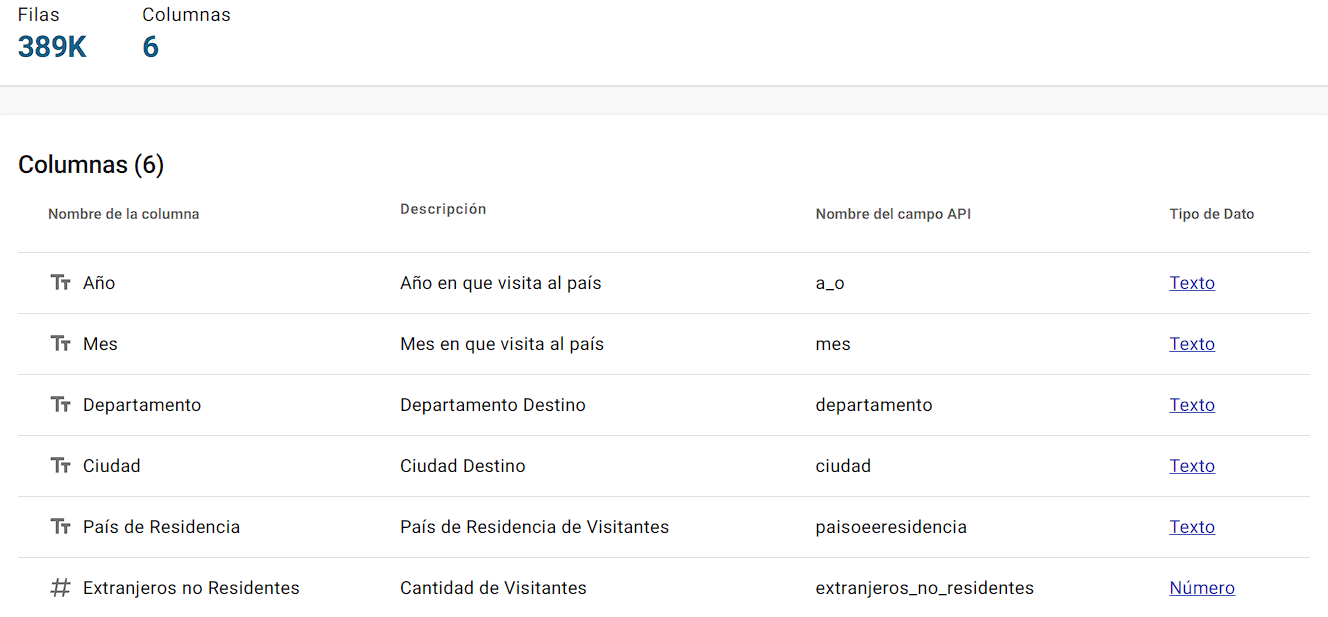

In [ ]:
data_visitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389455 entries, 0 to 389454
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Año                        389455 non-null  int64 
 1   Mes                        389455 non-null  int64 
 2   Departamento               389455 non-null  object
 3   Ciudad                     389455 non-null  object
 4   País de Residencia         389455 non-null  object
 5   Extranjeros no Residentes  389455 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 17.8+ MB


In [ ]:
filas_a_revisar = ["Departamento", "Ciudad", "País de Residencia"]

In [ ]:
registros_con_comas = {}
registros_con_comillas_simples = {}
registros_con_comillas_dobles = {}
registros_con_punto_y_coma = {}

for column in filas_a_revisar:
  registros_con_comas[column] = data_visitantes[column].str.contains(",").sum()
  registros_con_comillas_simples[column] = data_visitantes[column].str.contains("'").sum()
  registros_con_comillas_dobles[column] = data_visitantes[column].str.contains('"').sum()
  registros_con_punto_y_coma[column] = data_visitantes[column].str.contains(";").sum()

print(f"Registros con comas: {registros_con_comas}")
print(f"Registros con comillas simples: {registros_con_comillas_simples}")
print(f"Registros con comillas dobles: {registros_con_comillas_dobles}")
print(f"Registros con punto y coma: {registros_con_punto_y_coma}")


Registros con comas: {'Departamento': 0, 'Ciudad': 16590, 'País de Residencia': 0}
Registros con comillas simples: {'Departamento': 0, 'Ciudad': 0, 'País de Residencia': 0}
Registros con comillas dobles: {'Departamento': 0, 'Ciudad': 0, 'País de Residencia': 0}
Registros con punto y coma: {'Departamento': 0, 'Ciudad': 0, 'País de Residencia': 0}


In [ ]:
data_visitantes_sin_comas = data_visitantes.replace(",", "", regex=True)

In [ ]:
data_visitantes_sin_comas.tail(10)

,Año,Mes,Departamento,Ciudad,País de Residencia,Extranjeros no Residentes
389445,2024,4,Nariño,Pasto,República Dominicana,4
389446,2024,4,San Andres y Providencia,San Andrés,Reino Unido,12
389447,2024,4,Bolívar,Cartagena,Venezuela,961
389448,2024,4,Caldas,Chinchiná,Canadá,3
389449,2024,4,Tolima,Ibagué,Perú,16
389450,2024,4,San Andres y Providencia,Providencia,República Checa,5
389451,2024,4,Antioquia,Abejorral,Japón,1
389452,2024,4,Antioquia,Ituango,India,1
389453,2024,4,Antioquia,Armenia,México,2
389454,2024,4,Bogota D.C.,Bogotá D.C.,Azerbaiyán,8


In [ ]:
print(data_visitantes_sin_comas.isnull().sum())

Año                          0
Mes                          0
Departamento                 0
Ciudad                       0
País de Residencia           0
Extranjeros no Residentes    0
dtype: int64


In [ ]:
duplicados = data_visitantes_sin_comas.duplicated()
num_duplicados = duplicados.sum()
filas_duplicadas = data_visitantes_sin_comas[duplicados]

print(f"El numero de filas duplicadas es: {num_duplicados}")
print(f"Las filas duplicadas son: \n{filas_duplicadas}")

El numero de filas duplicadas es: 0
Las filas duplicadas son: 
Empty DataFrame
Columns: [Año, Mes, Departamento, Ciudad, País de Residencia, Extranjeros no Residentes]
Index: []


In [ ]:
data_visitantes_sin_comas.to_csv('data_visitantes_limpia.csv', index = False )

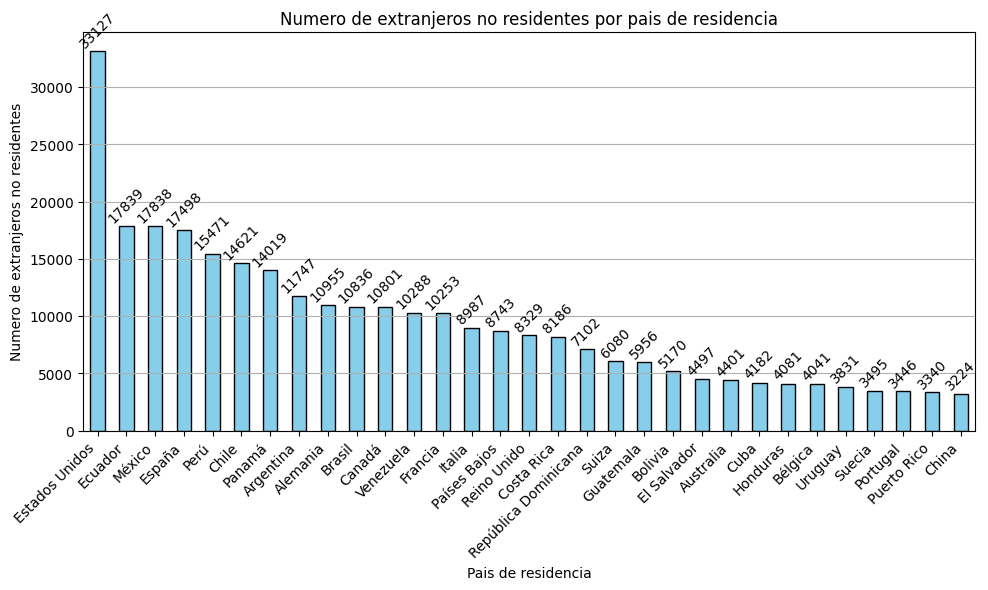

In [ ]:
conteo_paises = data_visitantes_sin_comas["País de Residencia"].value_counts()
conteo_paises_filtrado = conteo_paises[conteo_paises > 3000]

plt.figure(figsize = (10, 6))
conteo_paises_filtrado.plot(kind = 'bar', color = 'skyblue', edgecolor = 'k')
plt.title('Numero de extranjeros no residentes por pais de residencia')
plt.xlabel('Pais de residencia')
plt.ylabel('Numero de extranjeros no residentes')
plt.xticks(rotation = 45, ha = 'right')

for index, value in enumerate(conteo_paises_filtrado):
  plt.text(index, value + 100, str(value), rotation = 45,  ha = 'center', va = 'bottom')

plt.grid(axis = 'y')
plt.tight_layout()
plt.show()



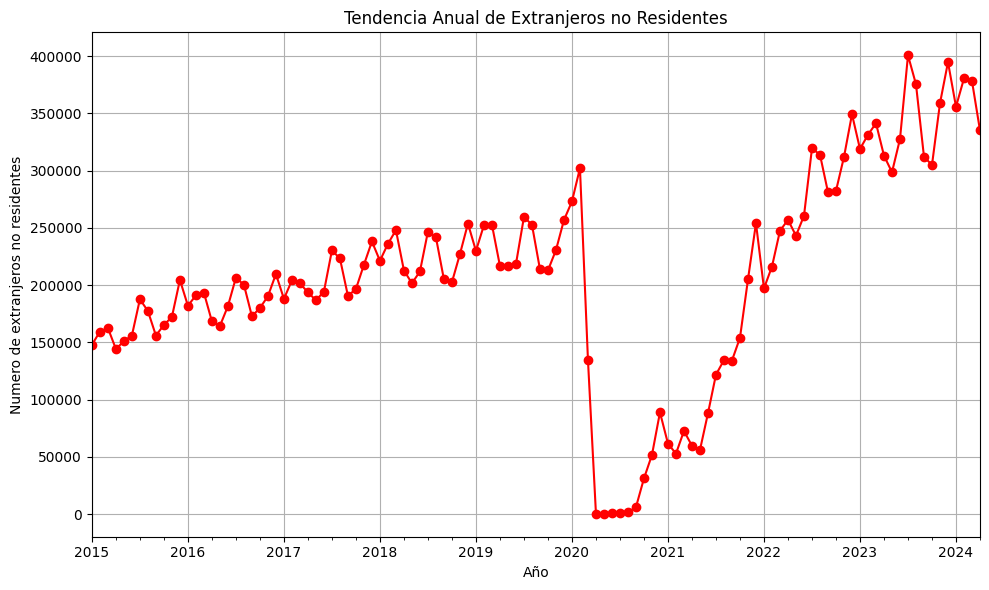

In [ ]:
data_visitantes_sin_comas['Fecha'] = pd.to_datetime(data_visitantes_sin_comas['Año'].astype(str) + '-' + data_visitantes_sin_comas['Mes'].astype(str) + '-01')

tendencia= data_visitantes_sin_comas.groupby("Fecha")["Extranjeros no Residentes"].sum()

plt.figure(figsize = (10, 6))
ax = tendencia.plot(kind = 'line', marker = 'o', color = 'red')
plt.title('Tendencia Anual de Extranjeros no Residentes')
plt.xlabel('Año')
plt.ylabel('Numero de extranjeros no residentes')
plt.grid(True)
plt.tight_layout()
plt.show()



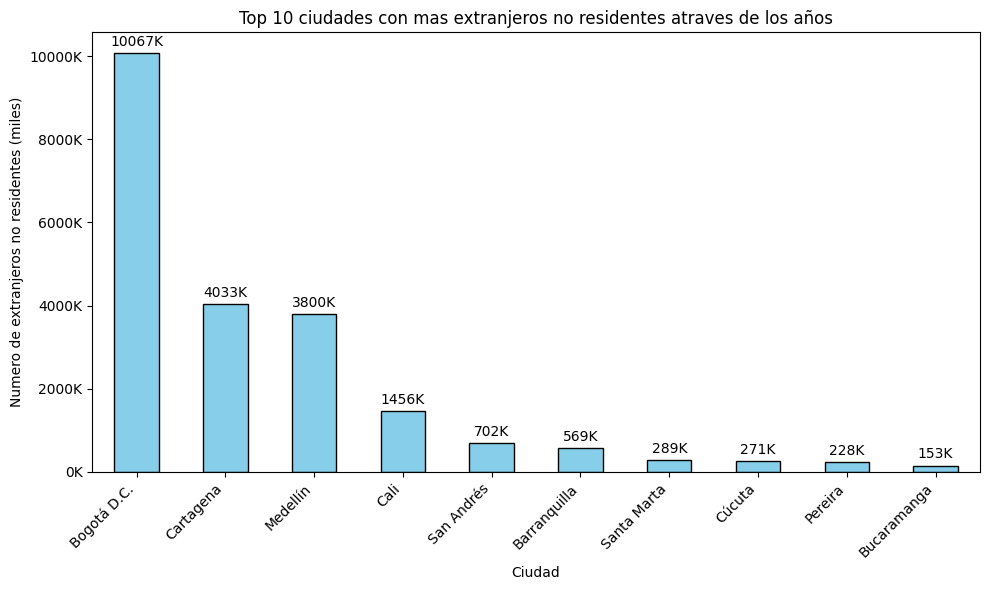

In [ ]:
import matplotlib.ticker as mtick

total_ciudades = data_visitantes_sin_comas.groupby('Ciudad')['Extranjeros no Residentes'].sum()

top_ciudades = total_ciudades.nlargest(10)

plt.figure(figsize=(10, 6))
ax = top_ciudades.plot(kind='bar', color='skyblue', edgecolor = 'k')
plt.title('Top 10 ciudades con mas extranjeros no residentes atraves de los años')
plt.xlabel('Ciudad')
plt.ylabel('Numero de extranjeros no residentes (miles)')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))


for index, value in enumerate(top_ciudades):
  plt.text(index, value + 100000, f'{int(value/1000)}K', ha = 'center', va = 'bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


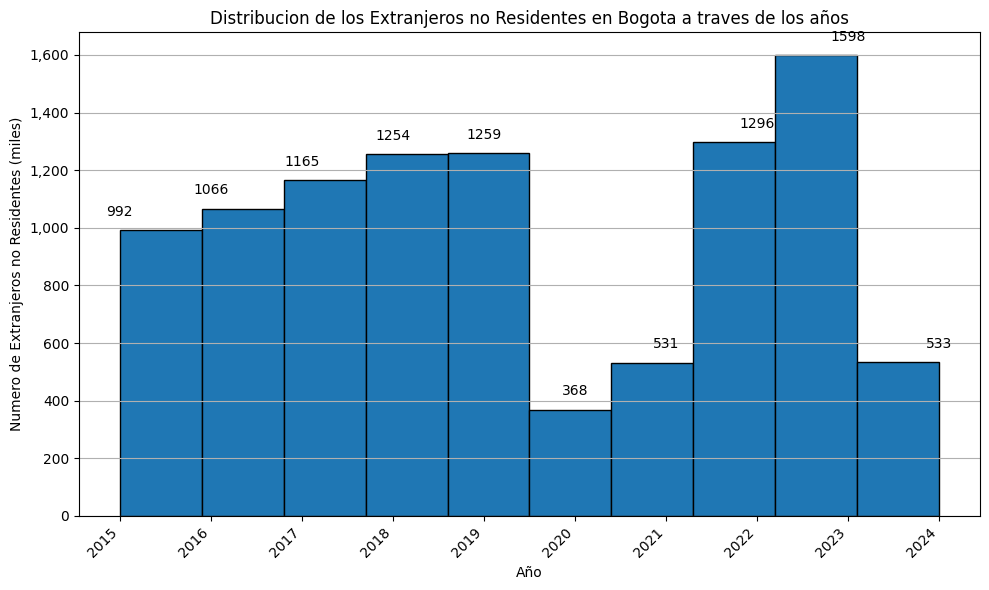

In [ ]:
import matplotlib.ticker as mtick

bogota_data = data_visitantes_sin_comas[data_visitantes_sin_comas['Ciudad'] == 'Bogotá D.C.']

bogota_anual = bogota_data.groupby('Año')['Extranjeros no Residentes'].sum()

plt.figure(figsize=(10, 6))
plt.hist(bogota_anual.index, bins = len(bogota_anual), weights = bogota_anual.values/1000, edgecolor = 'k')
plt.title('Distribucion de los Extranjeros no Residentes en Bogota a traves de los años')
plt.xlabel('Año')
plt.ylabel('Numero de Extranjeros no Residentes (miles)')
plt.grid(True, axis='y')

for i in range(len(bogota_anual)):
    plt.text(bogota_anual.index[i], bogota_anual.values[i]/1000 + 50, str(int(bogota_anual.values[i]/1000)), ha='center')

plt.xticks(rotation = 45, ha = 'right')
plt.xticks(bogota_anual.index)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()

plt.show()